In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


In [2]:
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
data = iris['data']
data[-5:] # 마지막 5게 요소

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [7]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df_iris['target'] = target

In [13]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

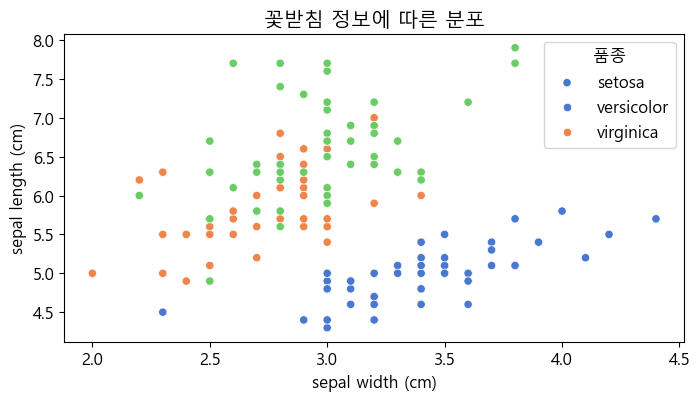

In [16]:
sns.scatterplot(data=df_iris, x='sepal width (cm)', y='sepal length (cm)', hue='target', palette='muted')
plt.legend(title='품종', loc='upper right', labels=iris.target_names)
plt.title('꽃받침 정보에 따른 분포')
plt.show()

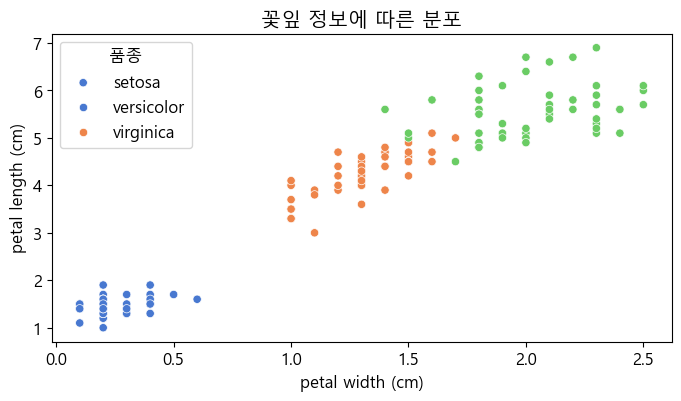

In [17]:
sns.scatterplot(data=df_iris, x='petal width (cm)', y='petal length (cm)', hue='target', palette='muted')
plt.legend(title='품종', loc='upper left', labels=iris.target_names)
plt.title('꽃잎 정보에 따른 분포')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_iris.drop('target', axis=1)

In [20]:
y = df_iris['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [22]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [24]:
X_test.shape, y_test.shape

((38, 4), (38,))

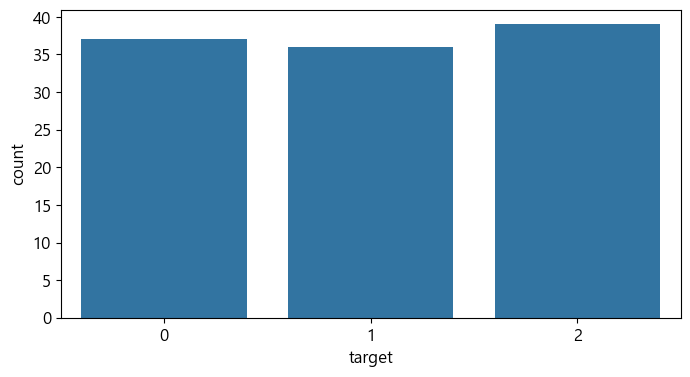

In [25]:
sns.countplot(x=y_train)
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)

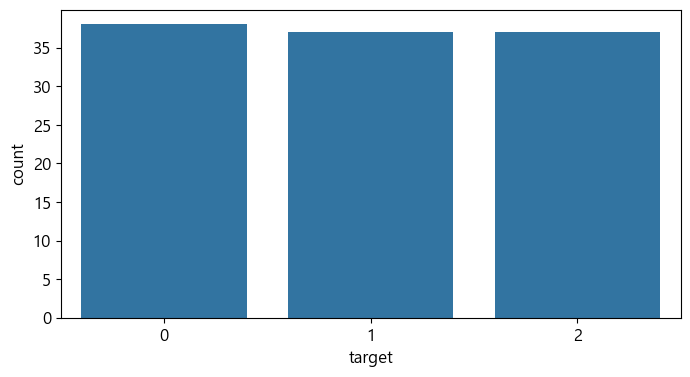

In [28]:
sns.countplot(x=y_train)
plt.show()

In [29]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [30]:
X_test.shape, y_test.shape

((38, 4), (38,))

In [31]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model_dtc = DecisionTreeClassifier(random_state=0)
model_dtc

DecisionTreeClassifier(random_state=0)

In [34]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2])

In [36]:
(y_pred == y_test).mean()

np.float64(0.9736842105263158)

In [37]:
y_pred[:5]

array([1, 1, 2, 2, 2])

In [65]:
y_test[:5].values

array([1, 1, 2, 2, 2])

In [41]:
from sklearn.metrics import classification_report
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



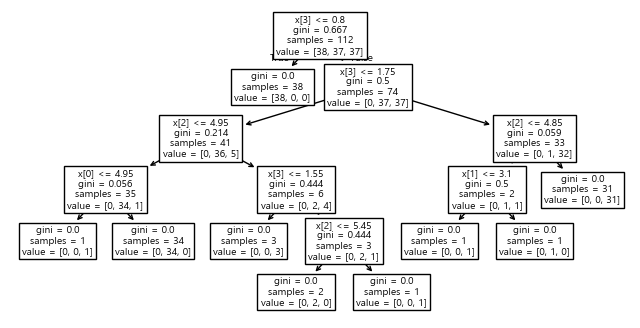

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(model_dtc)
plt.show()

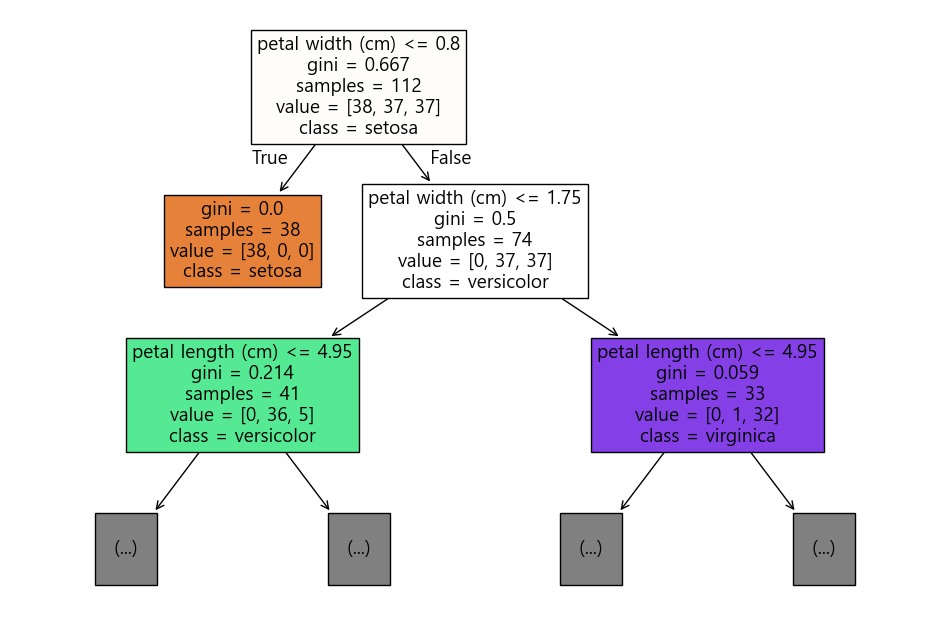

In [69]:
plt.figure(figsize=(12,8))
plot_tree(model_dtc, max_depth=2, filled=True,feature_names=feature_names, class_names=iris['target_names'])
plt.show()

[Text(0.4444444444444444, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]\nclass = setosa'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'petal length (cm) <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]\nclass = versicolor'),
 Text(0.2222222222222222, 0.3, 'sepal length (cm) <= 5.55\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.1111111111111111, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [0, 6, 1]\nclass = versicolor'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]\nclass = versicolor'),
 Text(0.4444444444444444, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.777777777777777

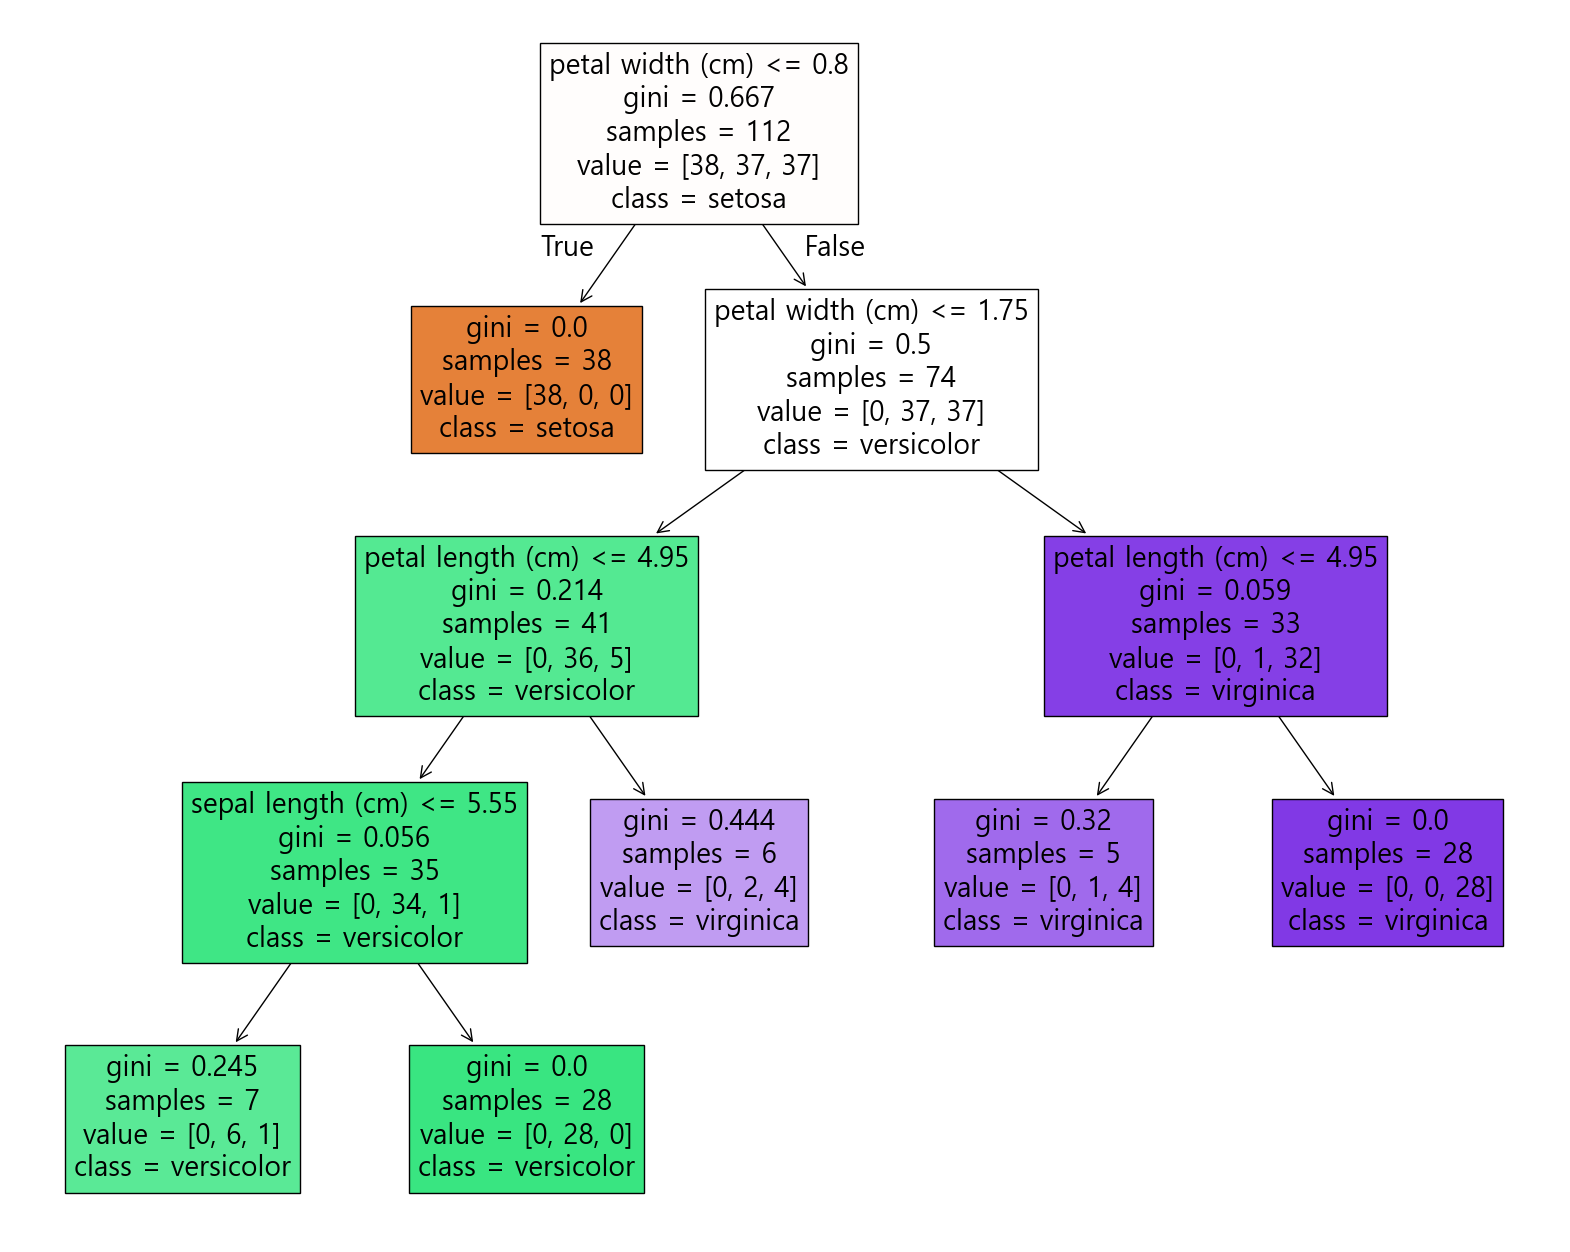

In [70]:
plt.figure(figsize=(20,16))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=iris['target_names'])

<Axes: >

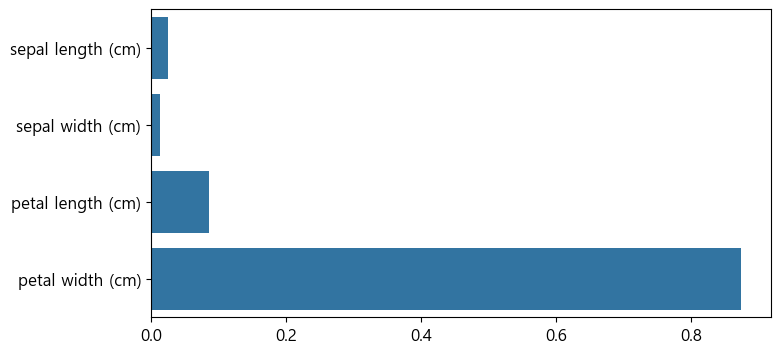

In [45]:
sns.barplot(x=model_dtc.feature_importances_, y=iris.feature_names)

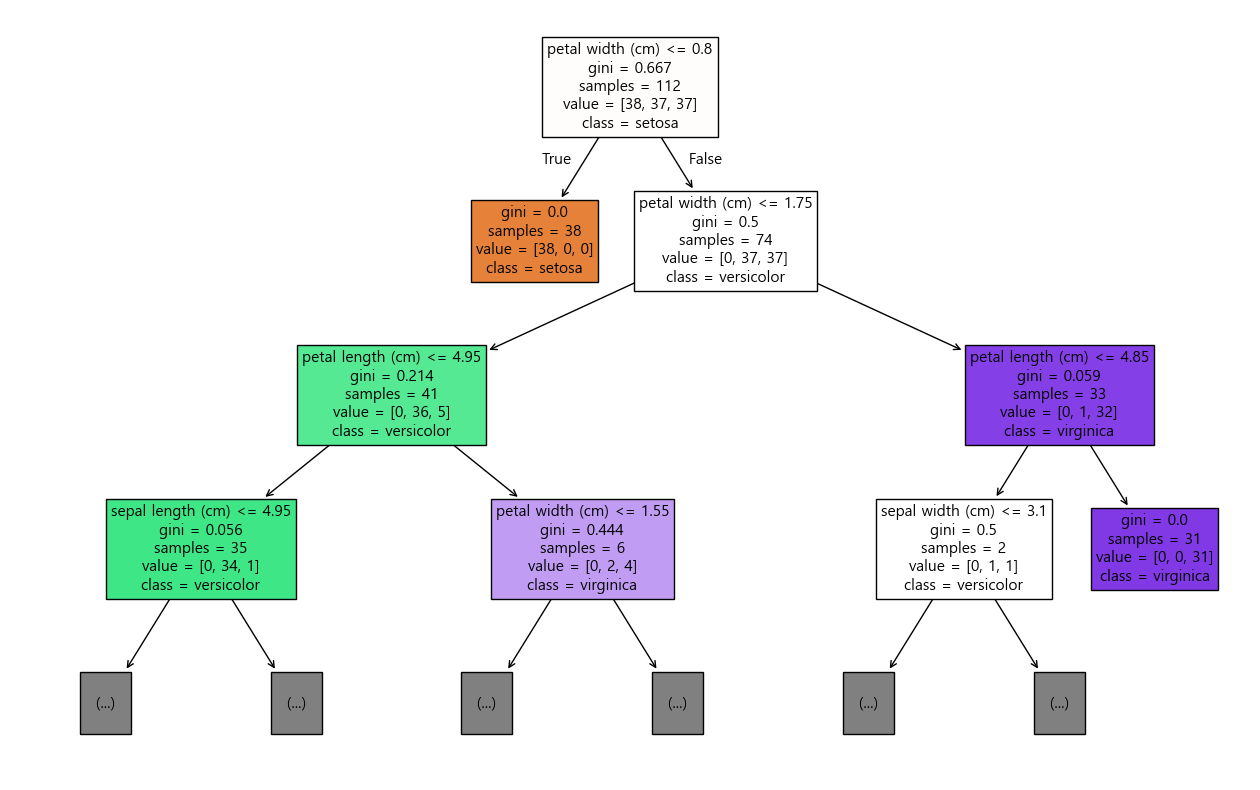

In [46]:
plt.figure(figsize=(16,10))
plot_tree(model_dtc, max_depth=3, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

<Axes: >

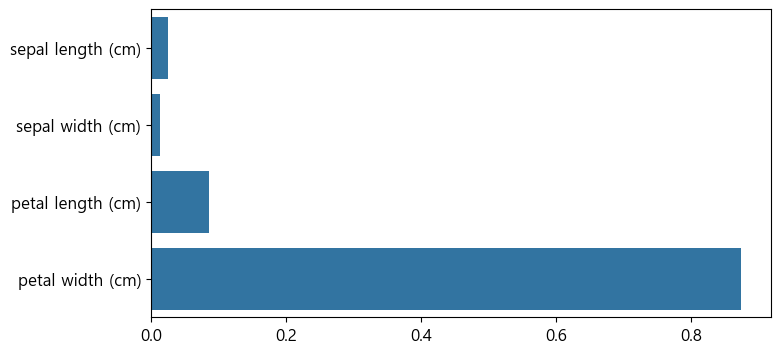

In [47]:
sns.barplot(x=model_dtc.feature_importances_, y=iris.feature_names)

In [48]:
model_dtc = DecisionTreeClassifier(random_state=0, min_samples_leaf=4)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



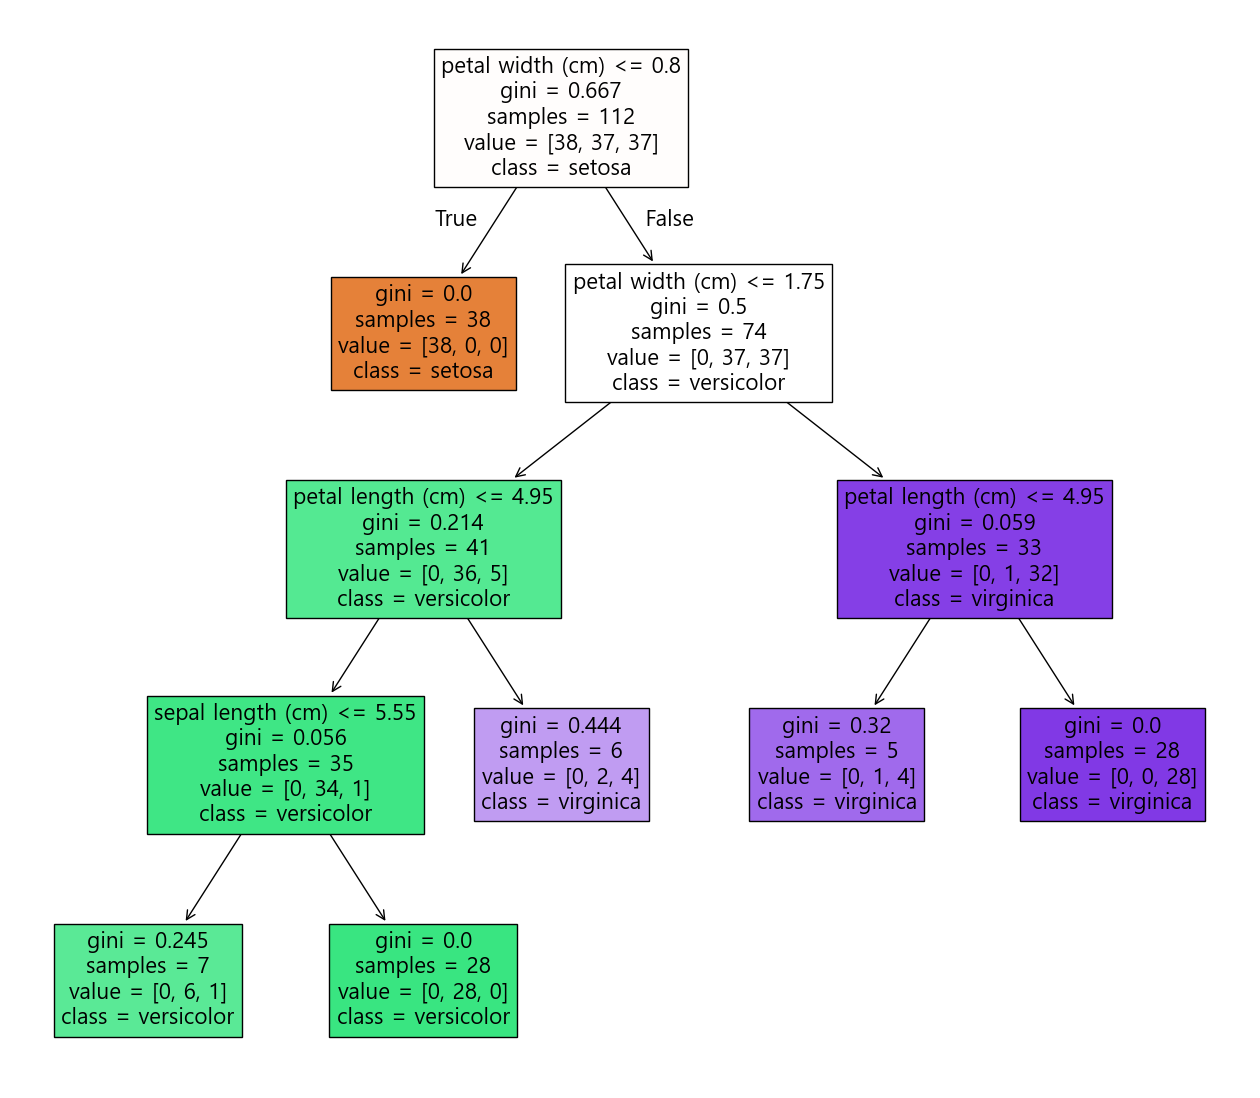

In [49]:
plt.figure(figsize=(16,14))
plot_tree(model_dtc, filled=True, feature_names=feature_names, class_names=iris['target_names'])
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model_lr = LogisticRegression(max_iter=500)

In [53]:
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [54]:
pred_lr = model_lr.predict(X_test)

In [55]:
pred_lr[:5]

array([1, 1, 2, 2, 2])

In [56]:
(pred_lr == y_test).mean()

np.float64(1.0)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [59]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

print(clf.predict(X_test[:4]))
print(clf.predict_proba(X_test[:4]))
print(clf.score(X_test, y_test))

[1 1 2 2]
[[9.93439951e-03 9.28964653e-01 6.11009474e-02]
 [1.60735054e-02 8.51174633e-01 1.32751861e-01]
 [4.96250130e-04 2.95474039e-01 7.04029711e-01]
 [1.13922688e-05 7.41230735e-02 9.25865534e-01]]
1.0


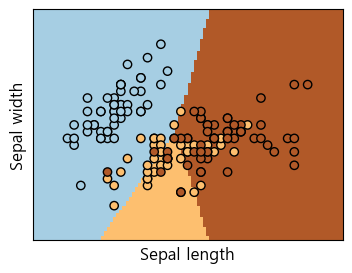

In [78]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

logreg = LogisticRegression(C=0.000002)
# C가 작을수록 과적합 확률 올라감
logreg.fit(X,Y)

_, ax = plt.subplots(figsize=(4,3))

DecisionBoundaryDisplay.from_estimator(
    logreg, 
    X, 
    cmap=plt.cm.Paired, 
    ax=ax, 
    response_method='predict', 
    plot_method = 'pcolormesh',
    shading='auto', 
    xlabel='Sepal length', 
    ylabel='Sepal width', 
    eps=0.5,)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()